# Human activity detector by smartphone sensor readings

In [1]:
#Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.metrics import f1_score

from sklearn.metrics import classification_report
from yellowbrick.classifier import ClassificationReport

In [2]:
#Training data
X_train = pd.read_csv("Dataset/Train/X_train.txt", sep = " ", header = None)
y_train = pd.read_csv("Dataset/Train/y_train.txt", sep = " ", header = None)

#Testing data
X_test = pd.read_csv("Dataset/Test/X_test.txt", sep = " ", header = None)
y_test = pd.read_csv("Dataset/Test/y_test.txt", sep = " ", header = None)

#activity labels
y_labels = pd.read_csv("Dataset/activity_labels.txt", header = None)

#feature labels
features = pd.read_csv("Dataset/features.txt", header = None)

scores = {}


In [3]:
y_labels

,0
0,1 WALKING
1,2 WALKING_UPSTAIRS
2,3 WALKING_DOWNSTAIRS
3,4 SITTING
4,5 STANDING
5,6 LAYING
6,7 STAND_TO_SIT
7,8 SIT_TO_STAND
8,9 SIT_TO_LIE
9,10 LIE_TO_SIT


In [4]:
classes = y_labels[0]
classes

0      1 WALKING           
1      2 WALKING_UPSTAIRS  
2      3 WALKING_DOWNSTAIRS
3      4 SITTING           
4      5 STANDING          
5      6 LAYING            
6      7 STAND_TO_SIT      
7      8 SIT_TO_STAND      
8      9 SIT_TO_LIE        
9     10 LIE_TO_SIT        
10    11 STAND_TO_LIE      
11    12 LIE_TO_STAND      
Name: 0, dtype: object

              precision    recall  f1-score   support

           1       0.83      0.84      0.83       496
           2       0.78      0.94      0.85       471
           3       0.83      0.61      0.70       420
           4       0.55      0.90      0.68       508
           5       0.86      0.40      0.54       556
           6       1.00      0.86      0.92       545
           7       0.27      0.65      0.38        23
           8       0.53      0.90      0.67        10
           9       0.52      0.75      0.62        32
          10       0.41      0.84      0.55        25
          11       0.63      0.55      0.59        49
          12       0.53      0.30      0.38        27

    accuracy                           0.75      3162
   macro avg       0.64      0.71      0.64      3162
weighted avg       0.79      0.75      0.74      3162



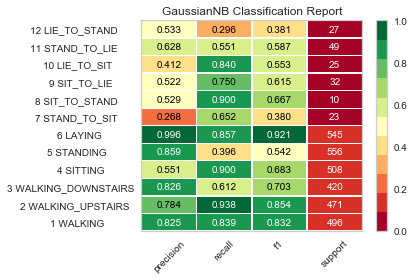

In [5]:
#Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train.values.ravel())
y_pred_gnb = gnb.predict(X_test)
print(classification_report(y_test, y_pred_gnb))

visualizer = ClassificationReport(gnb, support=True, classes = classes, cmap='RdYlGn')
visualizer.fit(X_train, y_train.values.ravel())  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof() 

f1 = f1_score(y_test, y_pred_gnb, average='micro')
scores.update({"GaussianNB": f1})

              precision    recall  f1-score   support

           1       0.77      0.57      0.65       496
           2       0.82      0.55      0.66       471
           3       0.51      0.89      0.65       420
           4       0.81      0.72      0.77       508
           5       0.79      0.81      0.80       556
           6       1.00      0.96      0.98       545
           7       0.41      0.61      0.49        23
           8       0.82      0.90      0.86        10
           9       0.44      0.56      0.49        32
          10       0.32      0.48      0.39        25
          11       0.60      0.57      0.58        49
          12       0.56      0.67      0.61        27

    accuracy                           0.75      3162
   macro avg       0.65      0.69      0.66      3162
weighted avg       0.78      0.75      0.75      3162



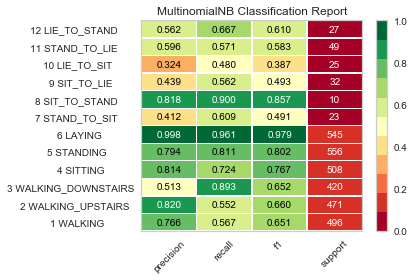

In [6]:
#Multinomial Naive Bayes
#Transform data from [-1, 1] to [0, 1]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

mnb = MultinomialNB()
mnb.fit(X_train_scaled, y_train.values.ravel())
y_pred_mnb = mnb.predict(X_test_scaled)
print(classification_report(y_test, y_pred_mnb))

visualizer = ClassificationReport(mnb, support=True, classes = classes, cmap='RdYlGn')
visualizer.fit(X_train_scaled, y_train.values.ravel())  # Fit the visualizer and the model
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.poof() 

f1 = f1_score(y_test, y_pred_mnb, average='micro')
scores.update({"MultinomialNB": f1})

C:\Users\Nelson\.conda\envs\MachineLearning\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Nelson\.conda\envs\MachineLearning\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.38      0.01      0.01       496
           2       0.02      0.00      0.00       471
           3       0.28      1.00      0.44       420
           4       1.00      0.00      0.01       508
           5       0.65      0.98      0.78       556
           6       0.71      1.00      0.83       545
           7       0.00      0.00      0.00        23
           8       0.00      0.00      0.00        10
           9       0.00      0.00      0.00        32
          10       0.00      0.00      0.00        25
          11       0.00      0.00      0.00        49
          12       0.00      0.00      0.00        27

    accuracy                           0.48      3162
   macro avg       0.25      0.25      0.17      3162
weighted avg       0.50      0.48      0.34      3162



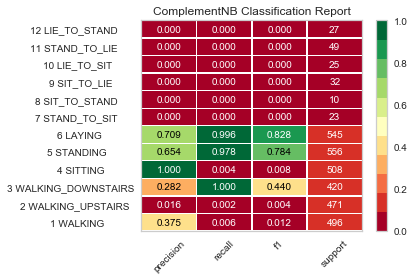

In [7]:
#Complement Naive Bayes
#Transform data from [-1, 1] to [0, 1]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

cnb = ComplementNB()
cnb.fit(X_train_scaled, y_train.values.ravel())
y_pred_cnb = cnb.predict(X_test_scaled)
print(classification_report(y_test, y_pred_cnb))

visualizer = ClassificationReport(cnb, support=True, classes = classes, cmap='RdYlGn')
visualizer.fit(X_train_scaled, y_train.values.ravel())  # Fit the visualizer and the model
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.poof() 

f1 = f1_score(y_test, y_pred_cnb, average='micro')
scores.update({"ComplementNB": f1})

              precision    recall  f1-score   support

           1       0.79      0.84      0.82       496
           2       0.77      0.93      0.84       471
           3       0.84      0.60      0.70       420
           4       0.87      0.74      0.80       508
           5       0.80      0.87      0.83       556
           6       1.00      0.98      0.99       545
           7       0.41      0.83      0.55        23
           8       0.62      0.80      0.70        10
           9       0.51      0.78      0.62        32
          10       0.58      0.72      0.64        25
          11       0.62      0.37      0.46        49
          12       0.67      0.59      0.63        27

    accuracy                           0.82      3162
   macro avg       0.71      0.75      0.71      3162
weighted avg       0.83      0.82      0.82      3162



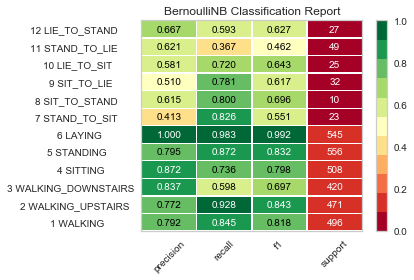

In [8]:
#Bernoulli Naive Bayes
bnb = BernoulliNB()
bnb.fit(X_train, y_train.values.ravel())
y_pred_bnb = bnb.predict(X_test)
print(classification_report(y_test, y_pred_bnb))

visualizer = ClassificationReport(bnb, support=True, classes = classes, cmap='RdYlGn')
visualizer.fit(X_train, y_train.values.ravel())  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof() 

f1 = f1_score(y_test, y_pred_bnb, average='micro')
scores.update({"BernoulliNB": f1})

In [9]:
scores


{'GaussianNB': 0.7473118279569892,
 'MultinomialNB': 0.74573055028463,
 'ComplementNB': 0.478494623655914,
 'BernoulliNB': 0.8241619228336498}

In [10]:
plt.bar(scores.keys(), scores.values())

SyntaxError: unexpected EOF while parsing (<ipython-input-10-a630c9abff09>, line 1)